## Data processing

In [1]:
import pandas as pd
import os
import shutil

In [2]:
import torchvision
import torch
print(torchvision.__version__)

0.15.2+cu118


In [3]:
# import numpy as np
# from sklearn.model_selection import train_test_split


# excel_path = './SBT-AI-CSIRO_FishData_GoogleDrive.xlsx'
# image_folder = './SBT_Otolith'  
# output_folder = 'data'


# df = pd.read_excel(excel_path)

# df['filename'] = df['Photo ID'].astype(str) + '.jpg'

# df['image_path'] = df['filename'].apply(lambda x: os.path.join(image_folder, x))
# df = df[df['image_path'].apply(os.path.exists)]
 
# df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# df['Age'] = df['Age'].replace([np.inf, -np.inf], np.nan)
# df['Age'] = df['Age'].fillna(0).astype(int)

In [11]:
# age_counts = df['Age'].value_counts().sort_index()


# for age, count in age_counts.items():
#     print(f"Age {age}: {count}")


每個年齡 (Age) 的圖片數量：

Age 0: 104 張
Age 1: 146 張
Age 2: 209 張
Age 3: 245 張
Age 4: 204 張
Age 5: 215 張
Age 6: 199 張
Age 7: 198 張
Age 8: 246 張
Age 9: 253 張
Age 10: 225 張
Age 11: 225 張
Age 12: 207 張
Age 13: 192 張
Age 14: 212 張
Age 15: 218 張
Age 16: 189 張
Age 17: 188 張
Age 18: 207 張
Age 19: 204 張
Age 20: 212 張
Age 21: 133 張
Age 22: 119 張
Age 23: 101 張
Age 24: 95 張
Age 25: 86 張
Age 26: 89 張
Age 27: 45 張
Age 28: 36 張
Age 29: 17 張
Age 30: 15 張
Age 31: 21 張
Age 32: 9 張
Age 33: 6 張
Age 34: 1 張
Age 35: 3 張
Age 37: 1 張
Age 38: 1 張
Age 39: 1 張


In [12]:
# age_counts = df['Age'].value_counts()
# valid_ages = age_counts[age_counts >= 2].index
# df_stratify = df[df['Age'].isin(valid_ages)]


# train_df, test_df = train_test_split(df_stratify, test_size=0.2, stratify=df_stratify['Age'], random_state=42)


# df_unstratify = df[~df.index.isin(df_stratify.index)]
# train_df = pd.concat([train_df, df_unstratify], ignore_index=True)

# def copy_images(subset_df, subset_name):
#     for _, row in subset_df.iterrows():
#         age = str(row['Age'])
#         dest_dir = os.path.join(output_folder, subset_name, age)
#         os.makedirs(dest_dir, exist_ok=True)

#         src_path = row['image_path']
#         dst_path = os.path.join(dest_dir, row['filename'])
#         shutil.copy2(src_path, dst_path)

# copy_images(train_df, 'train')
# copy_images(test_df, 'test')

影像依照 train/test 和 Age 分類完成 ✅


In [13]:
# df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# df = df[df['Age'] >= 21]
# df = df[df['image_path'].apply(os.path.exists)]

# sample_df = df.sample(n=200, random_state=42).reset_index(drop=True)
# train_df = sample_df.iloc[:160]
# test_df = sample_df.iloc[160:]

# def copy_images(subset_df, subset_name):
#     dest_dir = os.path.join(output_folder, subset_name, '21+')
#     os.makedirs(dest_dir, exist_ok=True)

#     for _, row in subset_df.iterrows():
#         src = row['image_path']
#         dst = os.path.join(dest_dir, row['filename'])
#         shutil.copy2(src, dst)

# copy_images(train_df, 'train')
# copy_images(test_df, 'test')

完成：已抽出 160 張訓練影像與 40 張測試影像，僅限 Age >= 21 ✅


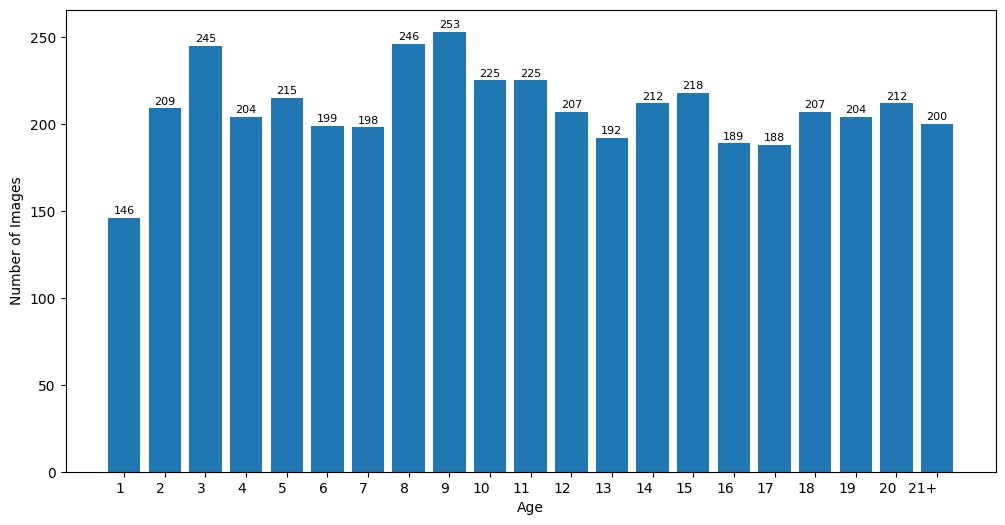

In [13]:
from collections import defaultdict
import matplotlib.pyplot as plt

def count_images_in_dataset(base_dir):
    data_splits = ['train', 'test']
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    counts = defaultdict(lambda: {'train': 0, 'test': 0})

    for split in data_splits:
        split_dir = os.path.join(base_dir, split)
        if not os.path.exists(split_dir):
            print(f"Directory not found: {split_dir}")
            continue

        for class_name in os.listdir(split_dir):
            class_dir = os.path.join(split_dir, class_name)
            if not os.path.isdir(class_dir):
                continue

            image_count = sum(
                1 for fname in os.listdir(class_dir)
                if os.path.isfile(os.path.join(class_dir, fname)) and os.path.splitext(fname)[1].lower() in image_extensions
            )
            counts[class_name][split] += image_count

    return counts

def plot_image_counts(counts):
    class_names = sorted(counts.keys(), key=lambda x: int(x))
    total_counts = [counts[cls]['train'] + counts[cls]['test'] for cls in class_names]

    # Optional: rename class "20" to "21+"
    if len(class_names) > 20:
        class_names[20] = "21+"

    plt.figure(figsize=(12, 6))
    bars = plt.bar(class_names, total_counts)
    plt.xlabel('Age')
    plt.ylabel('Number of Images')
#     plt.title('Image Count per Class')
    plt.xticks(rotation=0, ha='right')

    # Add value labels on top of each bar
    for bar, count in zip(bars, total_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 str(count), ha='center', va='bottom', fontsize=8)

#     plt.tight_layout()
    plt.show()

# Example usage
base_directory = './data'  # Change this to your actual dataset path
counts = count_images_in_dataset(base_directory)
plot_image_counts(counts)


In [14]:
def count_total_images(base_dir):
    data_splits = ['train', 'test']
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    total_count = 0

    for split in data_splits:
        split_dir = os.path.join(base_dir, split)
        if not os.path.exists(split_dir):
            print(f"Directory not found: {split_dir}")
            continue

        for class_name in os.listdir(split_dir):
            class_dir = os.path.join(split_dir, class_name)
            if not os.path.isdir(class_dir):
                continue

            count = sum(
                1 for fname in os.listdir(class_dir)
                if os.path.isfile(os.path.join(class_dir, fname)) and os.path.splitext(fname)[1].lower() in image_extensions
            )
            total_count += count

    return total_count

# Example usage
base_directory = './data'  # Change to your dataset root
total = count_total_images(base_directory)
print(f"Total number of images in train and test folders: {total}")


Total number of images in train and test folders: 4394


## Model training

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0, 1"
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transform
import timm

In [5]:
VERSION = 6
# PATHb
TRAIN_DATA = "./data/train"
TEST_DATA = "./data/test"
LOG_DIR = "./SBT_model/log"
TRAINING_LOG = os.path.join(LOG_DIR, "traing_log_{}.txt".format(VERSION))
TESTING_LOG = os.path.join(LOG_DIR, "testing_log_{}.txt".format(VERSION))
SAVE_MODEL = os.path.join("./SBT_model/model", "model_{}.pth".format(VERSION))

# PARAMETERS
BATCH_SIZE = 4
EPOCH = 100
LR = 0.0001

NUM_CLASSES = 21
NUM_WORKERS = 4

LOG_INTERVAL = 1

In [6]:
path = os.path.join(LOG_DIR, "history_model_{}".format(VERSION)) 
os.makedirs(path, exist_ok = True) 

In [7]:
timm.list_models('*resnet*')

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'eca_resnet33ts',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet200d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gcresnet33ts',
 'gcresnet50t',
 'inception_resnet_v2',
 'lambda_resnet26rpt_256',
 'lambda_resnet26t',
 'lambda_resnet50ts',
 'legacy_seresnet18',
 'legacy_seresnet34',
 'legacy_seresnet50',
 'legacy_seresnet101',
 'legacy_seresnet152',
 'nf_ecaresnet26',
 'nf_ecaresnet50',
 'nf_ecaresnet101',
 'nf_resnet26',
 'nf_resnet50',
 'nf_resnet101',
 'nf_seresnet26',
 'nf_seresnet50',
 'nf_seresnet101',
 'resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_gn',
 'resnet50c',
 'resnet50d',
 'resnet50s',
 'resnet50t',
 'resnet51q',
 'resnet61q',
 'resnet101',
 'resnet101c',
 'resnet101d',
 'resnet101s',
 'resnet152',
 'resnet152c',
 'r

In [8]:
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=NUM_CLASSES)

In [9]:
model = nn.DataParallel(model, device_ids=[0,1]) # server 2, 3
model.to(device)

DataParallel(
  (module): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none'

In [12]:
def train(model, train_loader, test_loader, criterion, optimizer, num_epoch):
    test_accuracy = 0
    best_model = model

    print("start training\n")

    for epoch in range(num_epoch):
        total_loss = 0
        accuracy = 0
        top3_accuracy = 0
        count = 0

        model.train()
        for batch_idx, (data, label) in enumerate(train_loader):
            data = data.to(device=device)
            label = label.to(device=device)

            result = model(data)
            loss = criterion(result, label)

            _, predicted_label = torch.max(result.data, 1)
            count += len(data)
            accuracy += (predicted_label == label).sum().item()
            total_loss += loss.item() * len(label)

            # 計算 top3 accuracy (±1 歲誤差)
            top3_correct = ((predicted_label == label) |
                            (predicted_label == label + 1) |
                            (predicted_label == label - 1))
            # 避免 label 超出 1~21 的邊界
            top3_correct &= (label >= 0) & (label <= 20)
            top3_accuracy += top3_correct.sum().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print("[{}/{}] | Training Loss: {:.4f} | Training Acc: {:.4f} | Top3 Acc (±1): {:.4f}".format(
            epoch, num_epoch, total_loss / count, accuracy / count, top3_accuracy / count))

        with open(TRAINING_LOG, "a+") as train_log:
            train_log.write("Epoch: {} \n".format(epoch))
            train_log.write("Training Loss: {:.4f} \n".format(total_loss / count))
            train_log.write("Training Accuracy: {:.4f} \n".format(accuracy / count))
            train_log.write("Top3 Accuracy (±1): {:.4f} \n\n".format(top3_accuracy / count))

        if (epoch % LOG_INTERVAL == 0):
            temp_accuracy = test(model, test_loader, criterion, epoch)
            if (temp_accuracy > test_accuracy):
                test_accuracy = temp_accuracy
                best_model = model

        torch.save(model.state_dict(), os.path.join(LOG_DIR, "history_model_{}".format(VERSION), "model_{}.pth".format(epoch)))
        torch.save(best_model.state_dict(), SAVE_MODEL)

    return model


def test(model, test_loader, criterion, num_epoch):
    model.eval()
    total_loss = 0
    accuracy = 0
    top3_accuracy = 0
    count = 0

    with torch.no_grad():
        for data, label in test_loader:
            data = data.to(device)
            label = label.to(device)

            result = model(data)
            loss = criterion(result, label)
            _, predicted_label = torch.max(result.data, 1)

            count += len(data)
            accuracy += (predicted_label == label).sum().item()
            total_loss += loss.item() * len(label)

            # 計算 top3 accuracy (±1 歲誤差)
            top3_correct = ((predicted_label == label) |
                            (predicted_label == label + 1) |
                            (predicted_label == label - 1))
            top3_correct &= (label >= 0) & (label <= 20)
            top3_accuracy += top3_correct.sum().item()

    print("        | Testing Loss: {:.4f}  | Testing Acc: {:.4f} | Top3 Acc (±1): {:.4f}".format(
        total_loss / count, accuracy / count, top3_accuracy / count))
    print("--------------------------------------------------------------------------")

    with open(TESTING_LOG, "a+") as test_log:
        test_log.write("Epoch: {} \n".format(num_epoch))
        test_log.write("Testing Loss: {:.4f} \n".format(total_loss / count))
        test_log.write("Testing Accuracy: {:.4f} \n".format(accuracy / count))
        test_log.write("Top3 Accuracy (±1): {:.4f} \n\n".format(top3_accuracy / count))

    return (accuracy / count)


In [31]:
from torchvision.datasets import ImageFolder

class NumericallySortedImageFolder(ImageFolder):
    def find_classes(self, directory):
        # 取得資料夾名稱清單
        classes = [d.name for d in os.scandir(directory) if d.is_dir()]
        # 按數字排序
        classes = sorted(classes, key=lambda x: int(x))
        # 生成 class_to_idx 字典
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

In [14]:
import torchvision.transforms as transforms

# Define a pipeline of transformations for the training data
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize images to 480x620
    transforms.ColorJitter(brightness=(0.8, 1.4), contrast=(1.1, 1.5), saturation=0.3, hue=0.2),  # randomly change the brightness, contrast and saturation
    transforms.RandomAffine(20, translate=(0.05, 0.05), shear=[15, 15]),  # randomly translate the image
    transforms.RandomHorizontalFlip(p=0.5),  # randomly flip image horizontally
    transforms.ToTensor(),  # convert the image to a PyTorch Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize the image
])

# Define a pipeline of transformations for the testing data (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize images to 480x620
    transforms.ToTensor(),  # convert the image to a PyTorch Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize the image
])


In [15]:
train_dataset = NumericallySortedImageFolder(TRAIN_DATA, transform=train_transform)
test_dataset = NumericallySortedImageFolder(TEST_DATA, transform=test_transform)

print(train_dataset.class_to_idx)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, drop_last=True)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18, '20': 19, '21': 20}


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9)

In [17]:
best_model = train(model, train_loader, test_loader, criterion, optimizer, EPOCH)  

start training

[0/100] | Training Loss: 2.5047 | Training Acc: 0.1526 | Top3 Acc (±1): 0.4046
        | Testing Loss: 2.3174  | Testing Acc: 0.1632 | Top3 Acc (±1): 0.3870
--------------------------------------------------------------------------
[1/100] | Training Loss: 1.9182 | Training Acc: 0.2457 | Top3 Acc (±1): 0.6110
        | Testing Loss: 2.0272  | Testing Acc: 0.2306 | Top3 Acc (±1): 0.5445
--------------------------------------------------------------------------
[2/100] | Training Loss: 1.7602 | Training Acc: 0.2961 | Top3 Acc (±1): 0.6674
        | Testing Loss: 1.7131  | Testing Acc: 0.3174 | Top3 Acc (±1): 0.7386
--------------------------------------------------------------------------
[3/100] | Training Loss: 1.6928 | Training Acc: 0.3220 | Top3 Acc (±1): 0.7042
        | Testing Loss: 1.7658  | Testing Acc: 0.3185 | Top3 Acc (±1): 0.6724
--------------------------------------------------------------------------
[4/100] | Training Loss: 1.6364 | Training Acc: 0.3340 |

KeyboardInterrupt: 

## Plot accuracy / loss curve

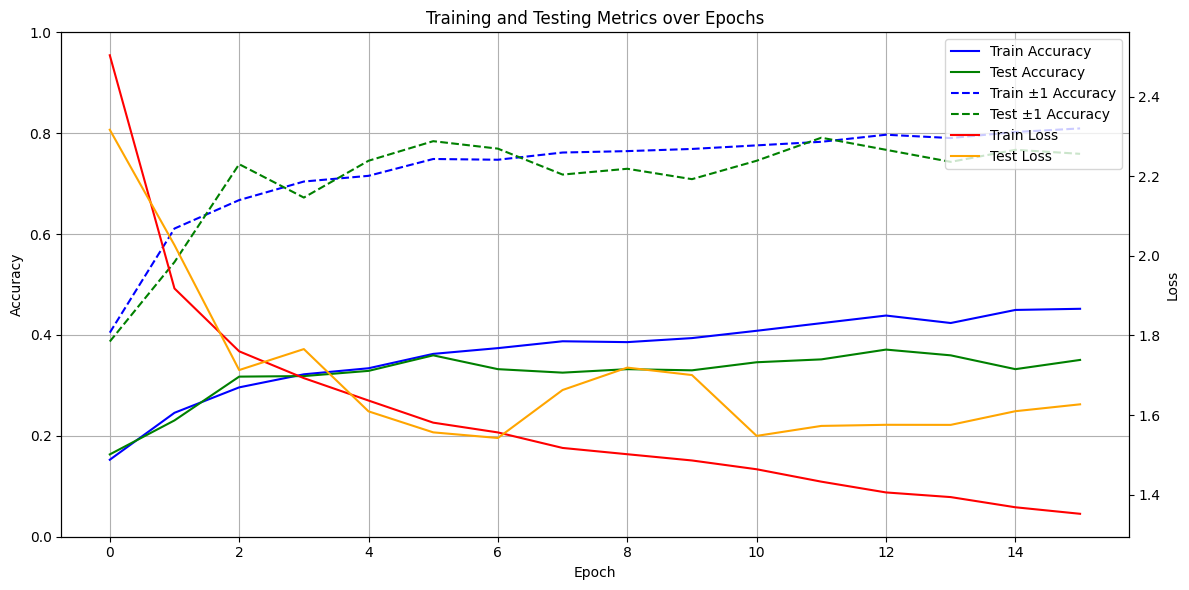

In [2]:
import re
import matplotlib.pyplot as plt

# 讀取檔案
with open("./SBT_model/log/traing_log_6.txt", "r") as f:
    train_log = f.read()

with open("./SBT_model/log/testing_log_6.txt", "r") as f:
    test_log = f.read()

# 擷取數值
def extract_values(log_text, prefix):
    pattern = r"Epoch: (\d+)\s+{} Loss: ([\d\.]+)\s+{} Accuracy: ([\d\.]+)\s+Top3 Accuracy \(±1\): ([\d\.]+)".format(prefix, prefix)
    matches = re.findall(pattern, log_text)
    epochs, loss, acc, acc_top3 = zip(*[(int(e), float(l), float(a), float(a3)) for e, l, a, a3 in matches])
    return epochs, loss, acc, acc_top3

# 提取 train/test 數據
train_epochs, train_loss, train_acc, train_top3 = extract_values(train_log, "Training")
test_epochs, test_loss, test_acc, test_top3 = extract_values(test_log, "Testing")

# 繪圖
fig, ax1 = plt.subplots(figsize=(12, 6))

# Accuracy and Top3 Accuracy on 左 y 軸
ax1.plot(train_epochs, train_acc, label='Train Accuracy', color='blue')
ax1.plot(test_epochs, test_acc, label='Test Accuracy', color='green')
ax1.plot(train_epochs, train_top3, label='Train ±1 Accuracy', color='blue', linestyle='--')
ax1.plot(test_epochs, test_top3, label='Test ±1 Accuracy', color='green', linestyle='--')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.set_xlabel('Epoch')
ax1.tick_params(axis='y')
ax1.grid(True)

# Loss on 右 y 軸
ax2 = ax1.twinx()
ax2.plot(train_epochs, train_loss, label='Train Loss', color='red')
ax2.plot(test_epochs, test_loss, label='Test Loss', color='orange')
ax2.set_ylabel('Loss')
ax2.tick_params(axis='y')

# 合併 legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Training and Testing Metrics over Epochs')
plt.tight_layout()
plt.show()


## Plot confusion matrix

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import os
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torchvision import datasets, io
import torchvision.transforms as transforms
import timm
# from efficientnet_pytorch import EfficientNet
import itertools

from collections import OrderedDict

In [26]:
NUM_CLASSES = 21
VERSION = 6

In [27]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1"
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [28]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.style.use("default")
#     print(cm)
    if normalize:
        cm = cm.numpy()
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0.0, vmax=1.0)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=16)
    plt.yticks(tick_marks, classes, fontsize=16)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i, j] > 0:
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black", fontsize=16)
        
    # save_path = cmt_path
    # os.makedirs(save_path, exist_ok=True)
        
    # plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.savefig("./SBT_model/log/confusion_matrix/confusion_matrix_{}.svg".format(VERSION))


In [29]:
def create_cmt(val_loader, model_ft, classes):
    model_ft = model_ft.eval()

    NUM_CLASSES = len(classes)  # Make sure NUM_CLASSES is defined
    val_cmt = torch.zeros(NUM_CLASSES, NUM_CLASSES, dtype=torch.int64)
    
    # Get the filenames (full path)
    fname = val_loader.dataset.samples

    # Path to save misclassification logs
    log_path = "./SBT_model/log/misclassification/mis_vit_L_v{}.txt".format(VERSION)
    with open(log_path, "a") as f:
        for k, (inputs, labels) in enumerate(val_loader, 0):
            batch_size = inputs.size(0)
            fname_batch = fname[k * batch_size: k * batch_size + batch_size]

            inputs = inputs.to('cuda:0')
            labels = labels.to('cuda:0')
            outputs = model_ft(inputs)
            _, predicted = torch.max(outputs, 1)

            for i in range(len(labels)):
                label = int(labels[i])
                pred = int(predicted[i])
                val_cmt[label, pred] += 1

                # Check for misclassification
                if label != pred:
                    img_path = fname_batch[i][0]
                    f.write(f"{img_path}    true: {classes[label]}    predict: {classes[pred]}\n")
    
#     plot_confusion_matrix(val_cmt, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues)
    plot_confusion_matrix(val_cmt, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21+']


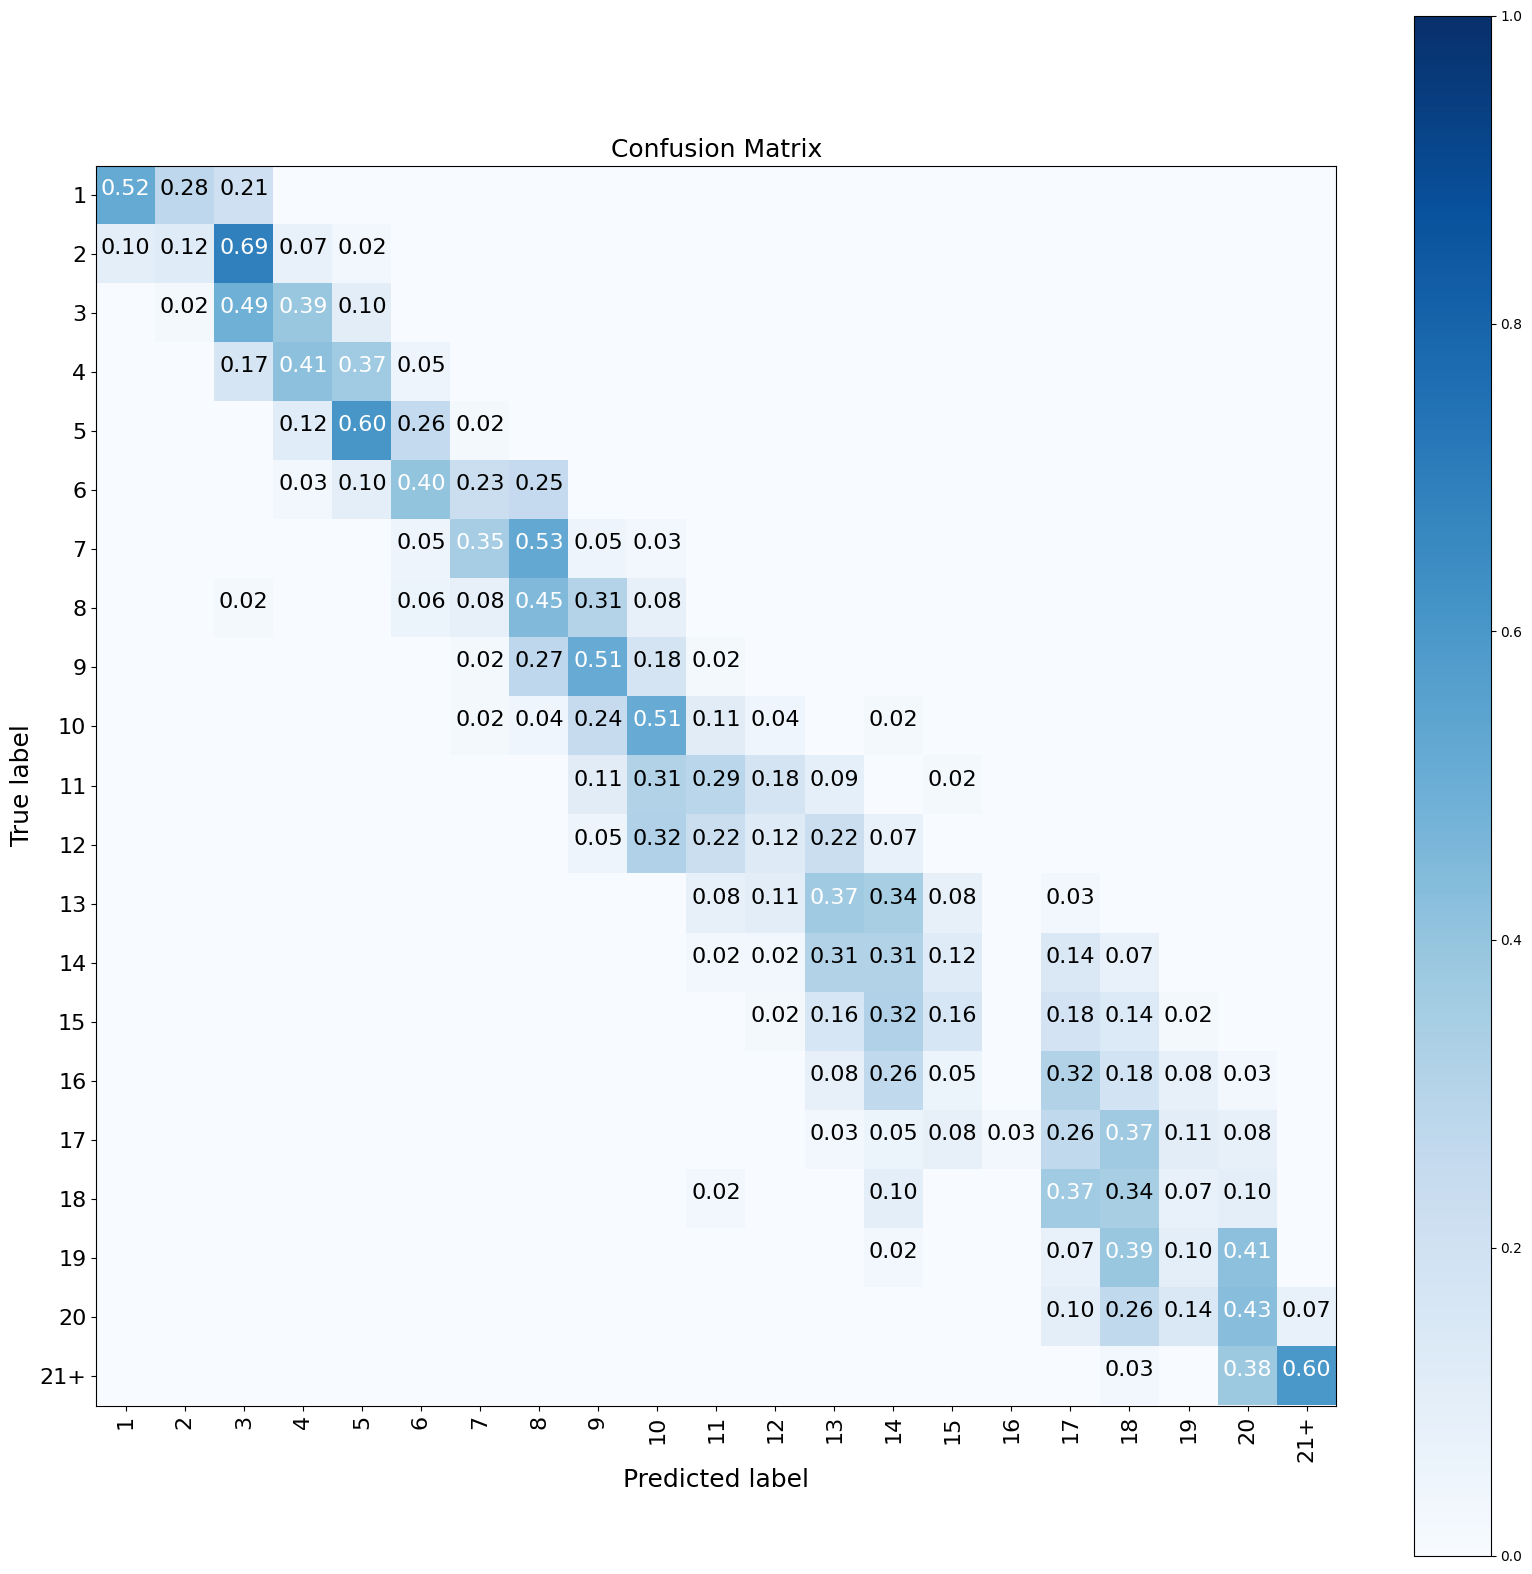

In [33]:
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=NUM_CLASSES)

state_dict = torch.load("./SBT_model/log/history_model_6/model_11.pth")

new_state_dict = OrderedDict()

for k, v in state_dict.items():
    if k[:7] == 'module.':
        name = k[7:]  # remove `module.`
    else:
        name = k
    new_state_dict[name] = v

model.load_state_dict(new_state_dict)
model.to(device)
model.eval()

# Define a pipeline of transformations for the training data
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize images to 480x620
    transforms.ColorJitter(brightness=(0.8, 1.4), contrast=(1.1, 1.5), saturation=0.3, hue=0.2),  # randomly change the brightness, contrast and saturation
    transforms.RandomAffine(20, translate=(0.05, 0.05), shear=[15, 15]),  # randomly translate the image
    transforms.RandomHorizontalFlip(p=0.5),  # randomly flip image horizontally
    transforms.ToTensor(),  # convert the image to a PyTorch Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize the image
])

# Define a pipeline of transformations for the testing data (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize images to 480x620
    transforms.ToTensor(),  # convert the image to a PyTorch Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize the image
])

TEST_DATA = "./data/test"
test_dataset = NumericallySortedImageFolder(TEST_DATA, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=4)

classes = test_dataset.classes
classes[-1] = "21+"
print(classes)

create_cmt(test_loader, model, classes)

## Grad-cam

In [2]:
import cv2
import numpy as np
import torch

from pytorch_grad_cam import GradCAM

from pytorch_grad_cam import GuidedBackpropReLUModel
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
import timm
from collections import OrderedDict

In [3]:
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=21)
state_dict = torch.load("./SBT_model/log/history_model_6/model_11.pth")

new_state_dict = OrderedDict()

for k, v in state_dict.items():
    if k[:7] == 'module.':
        name = k[7:]  # remove `module.`
    else:
        name = k
    new_state_dict[name] = v

model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [4]:
use_cuda = torch.cuda.is_available()
print(torch.cuda.is_available())
if use_cuda:
    model = model.cuda()

True


In [5]:
def reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1:, :].reshape(tensor.size(0),
    height, width, tensor.size(2))

    result = result.transpose(2, 3).transpose(1, 2)
    return result

In [6]:
cam = GradCAM(model=model,
            target_layers=[model.blocks[-1].norm1],
            use_cuda=use_cuda,
            reshape_transform=reshape_transform)

In [7]:
image_class = '8'
image_id = '16532'
image_path = "./data/test/{}/{}.jpg".format(image_class, image_id)

rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
rgb_img = cv2.resize(rgb_img, (224, 224))
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img, mean=[0.5, 0.5, 0.5],
                                std=[0.5, 0.5, 0.5])

# AblationCAM and ScoreCAM have batched implementations.
# You can override the internal batch size for faster computation.
cam.batch_size = 8

grayscale_cam = cam(input_tensor=input_tensor,
                    eigen_smooth=True,
                    aug_smooth=True)

# Here grayscale_cam has only one image in the batch
grayscale_cam = grayscale_cam[0, :]

cam_image = show_cam_on_image(rgb_img, grayscale_cam)
cv2.imwrite('./gradcam_fig/cam_SBT_{}_{}.jpg'.format(image_class, image_id), cam_image)

True

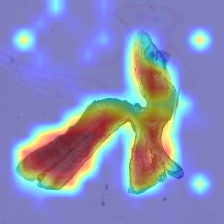

In [10]:
from PIL import Image
from IPython.display import display

# Load and show the image
img = Image.open('./gradcam_fig/cam_SBT_{}_{}.jpg'.format(image_class, image_id))
display(img)